# Descripcion del proyecto
Descripción del proyecto
Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

# Tabla de contenido
1. [Inicializacion](#Inicializacion)

    1.1.[Informacion general](#Informacion-general)
    
    
2. [Entrena y prueba el modelo para cada región en geo_data_0](#Entrena-y-prueba-el-modelo-para-cada-región-en-geo-data-0)

   2.1 [Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25](#Divide-los-datos)
   
   2.2 [Entrena el modelo y haz predicciones para el conjunto de validación.](#Entrena-el-modelo)
   
   2.3 [Guarda las predicciones y las respuestas correctas para el conjunto de validación.](#Guarda-las-predicciones)
   
   2.4[Muestra el volumen medio de reservas predicho y RMSE del modelo](#Muestra-el-volumen-medio)
   
   2.5[Entrena y prueba el modelo para cada región en geo_data_1](#Entrena-y-prueba-el-modelo-para-cada-región-en-geo-data-1)
   
   2.6[Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25](#Divide-los-datos)
   
   2.7[Entrena el modelo y haz predicciones para el conjunto de validación.](#Entrena-el-modelo)
   
   2.8[Guarda las predicciones y las respuestas correctas para el conjunto de validación.](#Guarda-las-predicciones)
   
   2.9[Muestra el volumen medio de reservas predicho y RMSE del modelo](#Muestra-el-volumen-medio)
   
   2.10[Entrena y prueba el modelo para cada región en geo_data_2](#Entrena-y-prueba-el-modelo-para-cada-región-en-geo-data-2)
   
   2.11[Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25](#Divide-los-datos)
   
   2.12[Entrena el modelo y haz predicciones para el conjunto de validación.](#Entrena-el-modelo)
   
   2.13[Guarda las predicciones y las respuestas correctas para el conjunto de validación.](#Guarda-las-predicciones)
   
   2.14[Muestra el volumen medio de reservas predicho y RMSE del modelo](#Muestra-el-volumen-medio)
   
3. [Prepárate para el cálculo de ganancias](#Preparate-para-el-calculo-de-ganacias)

    3.1[Almacena todos los valores necesarios para los cálculos en variables separadas](#Almacena-todos-los-valores)
    
    3.2[Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.](#Comparar-esta-cantidad-con-la-cantidad-media-de-reservas-en-cada-region)
     
    3.3[Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.](#Presenta-conclusiones)
    
    
4. [Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones](#Esribe-una-funcion)

   4.1.[Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').](#Elige-los-200-pozos-con-los-valores-de-prediccion-mas-altos)
   
   4.2[Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.](#Resume-el-volumen-objetivo-de-reservas-predicho)
   
   4.3[Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.](#Calcula-la-ganancia-potencial)
   
   
5. [Calcula riesgos y ganancias para cada región](#Calcula-riesgos-y-ganancias-para-cada-region)

    
   5.1.[Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.](#Utilizando-las-preicciones-que-almacenaste-en-el-paso-4.2)
   
    
    
   5.2.[Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.](#Encuentra-el-beneficio-promedio-elintervalo-de-confianza-del-95-y-el-riesgo-de-perdidas)
   
   
   5.3.[Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?](#Presenta-tus-conclusiones)
     
6. [Conclusión general](#Conclusión-general)
    

## Inicializacion
Abre el archivo de datos y estudia la información general


In [1]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression



In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv',sep=',', header=0)
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv',sep=',', header=0)
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv',sep=',', header=0)

### Informacion general
sobre los DataFrames geo_data_0, geo_data_1, geo_data_2 

In [3]:
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(geo_data_0))

Primera filas:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

El total de valores ausentes es:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

El total de valores duplicados es:
0
None


In [4]:
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(geo_data_1))

Primera filas:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

El total de valores ausentes es:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

El total de valores duplicados es:
0
None


In [5]:
def first_lookup(datos):
    print('Primera filas:')
    print(datos.head())
    print()
    print('Informacion:')
    print(datos.info())
    print()
    print('El total de valores ausentes es:')
    print(datos.isna().sum())
    print()
    print('El total de valores duplicados es:')
    print(datos.duplicated().sum())
print(first_lookup(geo_data_2))

Primera filas:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

El total de valores ausentes es:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

El total de valores duplicados es:
0
None


Se analizaron los los 3 DataFrame de las respectivas regiones donde se analizaron su infomacion, las primeras 5 filas para darnos un panorama de que tipo de datos nos enfrentaremos, los valores ausentes y los duplicados y no se encontraron.

In [6]:
# Eliminar la columna 'id' del DataFrame
geo_data_0 = geo_data_0.drop(columns=['id'])
geo_data_1 = geo_data_1.drop(columns=['id'])
geo_data_2 = geo_data_2.drop(columns=['id'])

In [7]:
print(geo_data_0.info())
print(geo_data_1.info())
print(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float6

## Entrena y prueba el modelo para cada región en geo_data_0.csv:

In [8]:
#Preparar las caracteristicas y el objetivo
features_0 = geo_data_0.drop(['product'], axis=1)
target_0 = geo_data_0['product']
print(type(target_0))

<class 'pandas.core.series.Series'>


### Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

In [9]:
# Dividir los datos en conjuntos de entrenamiento y validacion
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=12345)

In [10]:
print(features_train_0.shape)
print(target_train_0.shape)
print(features_valid_0.shape)
print(target_valid_0.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [11]:
# Definir las columnas numericas
numeric_0 = ['f0', 'f1', 'f2'] 

In [12]:
# Guardar los nombres de las columnas antes de la estandarización
column_names = numeric_0

In [13]:
## Estandarizar las caracteristicas numericas
scaler = StandardScaler()
scaler = scaler.fit(features_train_0[numeric_0])
features_train_0 = scaler.transform(features_train_0[numeric_0]) 
features_valid_0 = scaler.transform(features_valid_0[numeric_0])
print(features_train_0)
print(features_valid_0)


[[-0.5448279   1.39026372 -0.09495893]
 [ 1.4559119  -0.48042154  1.20956708]
 [ 0.26045969  0.82506858 -0.2048645 ]
 ...
 [ 0.41894874 -1.29678805 -0.19640667]
 [ 0.40007671 -1.46687406 -0.44531736]
 [ 1.746246    0.02741521  2.76684795]]
[[ 0.51791717 -0.61009708 -0.1262255 ]
 [ 0.56839077 -0.08606292 -0.81491398]
 [ 0.80568773 -1.61328908 -1.34134194]
 ...
 [-0.13884985  1.59507055 -0.90348498]
 [ 0.65826677 -1.42822432  0.62196665]
 [ 1.40955604 -0.65040653  0.76966953]]


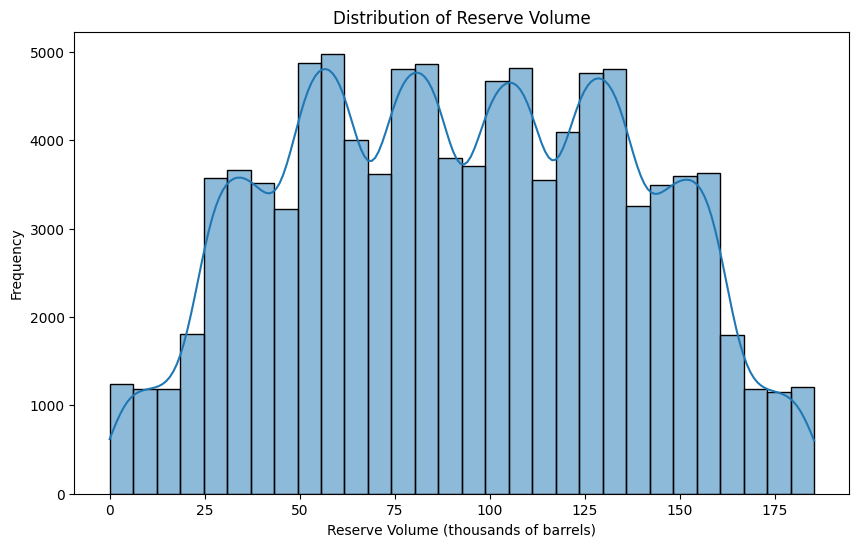

In [14]:
# Visualizar la distribucion del objetivo
plt.figure(figsize=(10, 6))
sns.histplot(target_0, bins=30, kde=True)
plt.title('Distribution of Reserve Volume')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.ylabel('Frequency')
plt.show()

a) La distribucion multimodal al presentar varios tipos (modas) nos indican que los datos pueden estar agrupados en diferentes rangos indicando subpoblaciones dentro de los datos
b) Simetria la distribucion parece tener un equilibrio balanceado se puede ver en los valores centralos y diferencias entre los extremos
c) Los valores mas comunes del volumne de reserva estan concentrados alrededor de los rangos de 50, 100, 125 ml de barriles indicando volumenes tipicos en el conjunto de datos

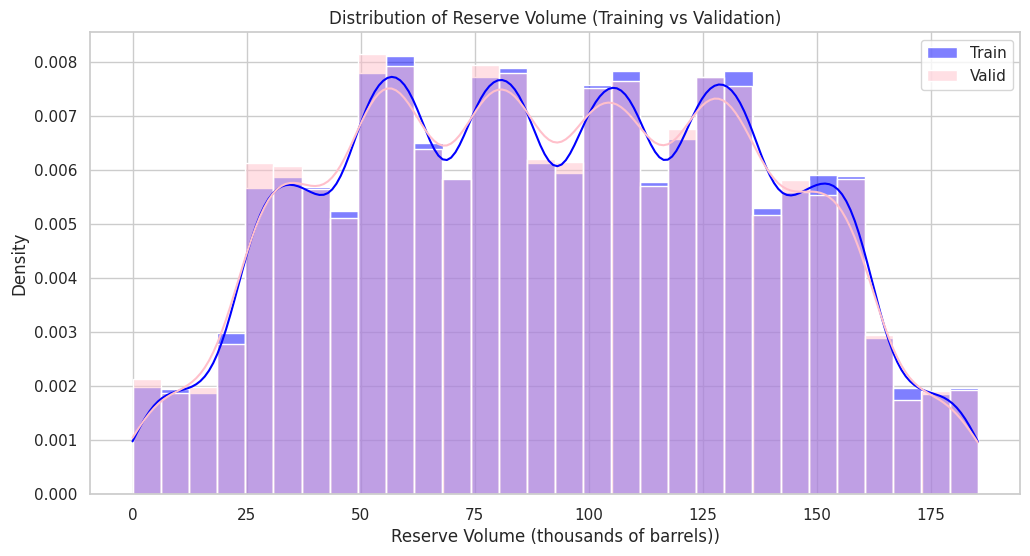

In [15]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 6))
# Histograma para el conjunto de entrenamiento
sns.histplot(target_train_0, bins = 30, kde = True, color = 'blue', label = 'Train', stat= 'density', alpha=0.5)
# Histograma para el conjunto de validacion
sns.histplot(target_valid_0, bins=30, kde=True, color='pink', label='Valid', stat='density', alpha=0.5)
plt.title('Distribution of Reserve Volume (Training vs Validation)')
plt.xlabel('Reserve Volume (thousands of barrels))')
plt.ylabel('Density')
plt.legend()
# Mostrar el grafico
plt.show()

a)Las distribuciones entre el entrenamiento y la validacion son similares en forma general  y densidad esto es deseable, lo que no indica que no hay sobreajuste ni subajuste aprarentemente.
b) La multimodalidad ambas distribuciones muestran modas  alrededor de valores de 50, 100, 125 mil de barriles esto cons afrima la consistencia entre train y valid tiene la composicion equilibrada
c) Las areas bajo la curva nos muestra equilibrio entre los dos conjunto de datos y no se presenta un sesgo significativo entre los datos

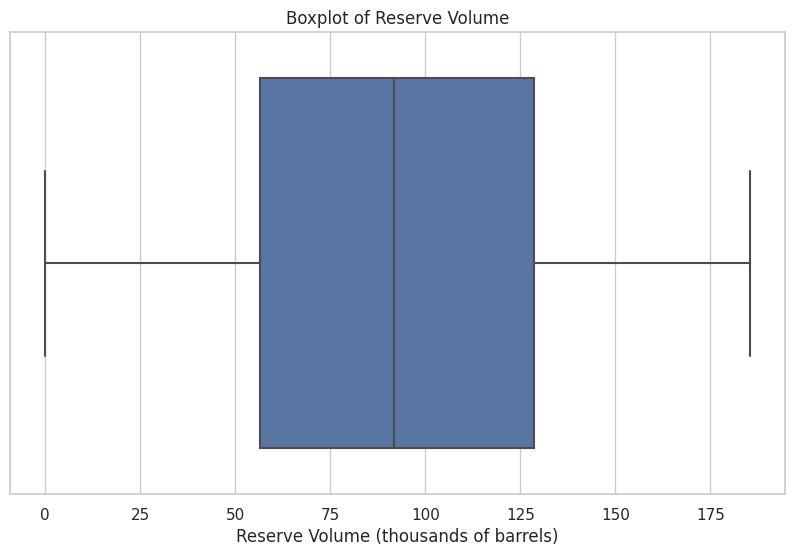

In [16]:
# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_0)
plt.title('Boxplot of Reserve Volume')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.show()

a)El rango Q1 y Q3 es amplio mostrando una variacionen los valores centrales aproximadamente el 50% de los datos.
b) La mediana esta casi en el centro intercuantilico nos indica simetria en los datos
c)No hay outliers estos indica una distrucion uniforme en el rango establecido de los datos

In [17]:
# Calcular estadisticas descriptivas para la variable objetivo
stats = target_0.describe()
print('Estadisticas descriptivas del volumen de reservas:')
print(stats)

Estadisticas descriptivas del volumen de reservas:
count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64


### Entrena el modelo y haz predicciones para el conjunto de validación.

In [18]:
# Entrenar el modelo de regresion lineal
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)

LinearRegression()

In [19]:
# Aplicar validación cruzada
cv_scores_0 = cross_val_score(model_0, features_train_0, target_train_0, cv=5, scoring='neg_mean_squared_error')
# Convertir los scores a valores positivos (ya que cross_val_score devuelve negativos para MSE)
mse_cv_0 = -cv_scores_0
rmse_cv_0 = np.sqrt(mse_cv_0)

print('MSE por fold_0:', mse_cv_0)
print('RMSE por fold_0:', rmse_cv_0)
print('MSE promedio_0:', mse_cv_0.mean())
print('RMSE promedio_0:', rmse_cv_0.mean())

MSE por fold_0: [1421.15788282 1427.75616975 1417.65298495 1432.67941499 1419.44451473]
RMSE por fold_0: [37.69824774 37.7856609  37.65173283 37.85075184 37.67551612]
MSE promedio_0: 1423.7381934496414
RMSE promedio_0: 37.73238188617927


a) El valor de RMSE para el modelo de regresion lineal al aplicar validacion cruzada nos indica un rendimiento consistente en las direferentes particiones de los datos 
b) RMSE promedio el modelo es robusto y no existe una gran variablidad entre el rendimiento de las diferentes iteraciones en la validacion cruzada.
En comparacion presentan una variablidad baja

### Guarda las predicciones y las respuestas correctas para el conjunto de validación.

In [20]:
# Hacer predicciones en el conjunto de  validacion
predictions_valid_0 = model_0.predict(features_valid_0)

In [21]:
# Calculo de R2 del conjunto de validacion
r2_0 = r2_score(target_valid_0, predictions_valid_0)
print('R2-Valid-0=', r2_0 )

R2-Valid-0= 0.27994321524487786


Indica variabilidad en el volumen de reservas el modelo no es optimo no se esta capturando bien las relaciones entre las variables

###  Muestra el volumen medio de reservas predicho y RMSE del modelo.

In [22]:
# Calcular MSE y RMSE para el modelo de regresión lineal
mse_valid_0 = mean_squared_error(target_valid_0, predictions_valid_0)
print('MSE-valid-0 =', mse_valid_0)
print('RMSE-valid-0 =', mse_valid_0 ** 0.5)

MSE-valid-0 = 1412.2129364399243
RMSE-valid-0 = 37.5794217150813


El valor de MRSE nos indica que tienen un error moderado de predicciones y en comparacion con la validacion cruzada tiene un rendimiento consistente en diferentes conjuntos de datos

In [23]:
# Calcular y mostrar el volumen medio de reservas predicho en ambos conjuntos
mean_predicted_valid_0 = np.mean(predictions_valid_0)
print('Volumen medio de reservas predicho (valid_0) =', mean_predicted_valid_0)

Volumen medio de reservas predicho (valid_0) = 92.59256778438035


El valor es consistente con el valor que se proporciona en las estadistias despecritivas en la media, el modelo es capaz de predecir la media con precision, pero presenta variabilidad en predicciones individuales

###  Entrena y prueba el modelo para cada región en geo_data_01csv

In [24]:
#Preparar las caracteristicas y el objetivo
features_1 = geo_data_1.drop(['product'], axis=1)
target_1 = geo_data_1['product']
print(type(target_1))

<class 'pandas.core.series.Series'>


### Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

In [25]:
# Dividir los datos en conjuntos de entrenamiento y validacion
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)

In [26]:
print(features_train_1.shape)
print(target_train_1.shape)
print(features_valid_1.shape)
print(target_valid_1.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [27]:
# Definir las columnas numericas
numeric_1 = ['f0', 'f1', 'f2'] 

In [28]:
# Guardar los nombres de las columnas antes de la estandarización
column_names = numeric_1

In [29]:
## Estandarizar las caracteristicas numericas
scaler = StandardScaler()
scaler = scaler.fit(features_train_1[numeric_1])
features_train_1 = scaler.transform(features_train_1[numeric_1]) 
features_valid_1 = scaler.transform(features_valid_1[numeric_1])
print(features_train_1)
print(features_valid_1)

[[-0.85085526  0.62442838  0.29694289]
 [ 1.97193524  1.83227487  0.29433274]
 [ 1.07930536  0.17012731 -0.29641817]
 ...
 [ 1.04707022 -0.64999232  1.47336769]
 [-0.11478048 -1.19069924  0.29915578]
 [-0.64614644  0.09907453  0.29561113]]
[[-0.16861596  0.57137209  0.29747121]
 [ 0.87838443 -1.77290335 -0.29390091]
 [-0.85297627 -0.00498601 -0.87650171]
 ...
 [-1.14617169 -0.11924701  1.47141699]
 [-0.83946623  0.78552051  0.302943  ]
 [ 1.0487796  -0.27590745 -0.29570604]]


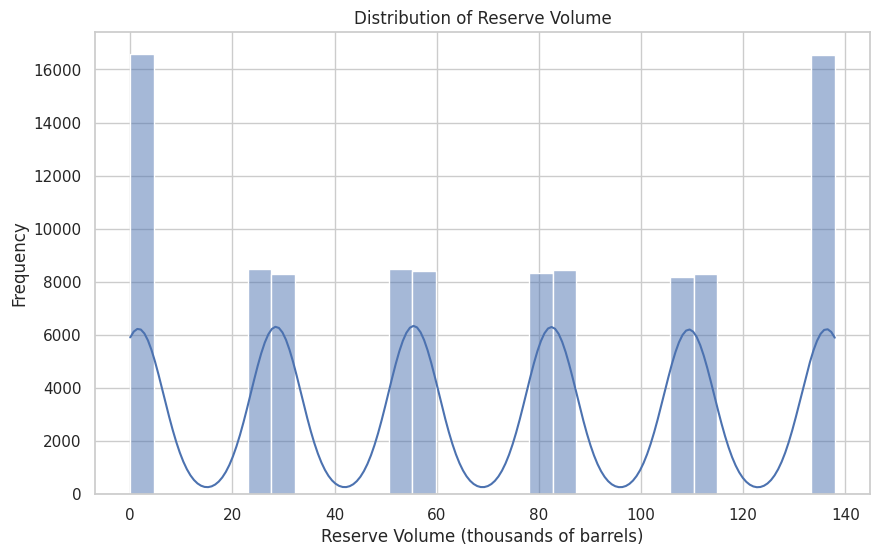

In [30]:
# Visualizar la distribucion del objetivo
plt.figure(figsize=(10, 6))
sns.histplot(target_1, bins=30, kde=True)
plt.title('Distribution of Reserve Volume')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.ylabel('Frequency')
plt.show()

a) La distribucion multimodal muestra una cantidad considerable bien definidad de datos 
b) Frecuencia desigual existe una variacion significativa en la frecuencia entre los picos, no quiere decir que hay volumnes de reserva mucho mas frecuentes que otros
c) La distribucuion de los picos esta uniformemente espaciada nos indica una cierta periodicidad en como se distribuyen los datos, esta periodicidad puede indicsr un sesgo en el porcesamiento de los datos

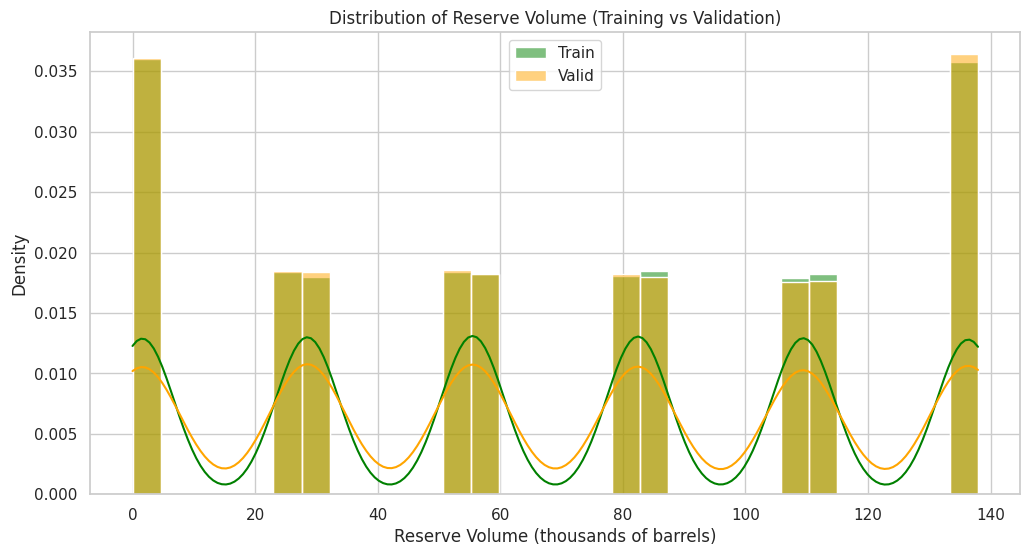

In [31]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 6))
# Histograma para el conjunto de entrenamiento
sns.histplot(target_train_1, bins = 30, kde = True, color = 'green', label = 'Train', stat= 'density', alpha=0.5)
# Histograma para el conjunto de validacion
sns.histplot(target_valid_1, bins=30, kde=True, color='orange', label='Valid', stat='density', alpha=0.5)
plt.title('Distribution of Reserve Volume (Training vs Validation)')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.ylabel('Density')
plt.legend()

# Mostrar el grafico
plt.show()

a) Las curvas de densidad para el conjunto de entrenamiento y validacion son casi semejantes esto es un buen indicativo ya que el modelo puede generalizar bien
b) Distribucion multimodal tanto el conjunto de entrenamiento y validacion presentan varios picos distribuidos de manera periodica
c) Se observan pequeñas diferencias en la densidad de algunos intervalos

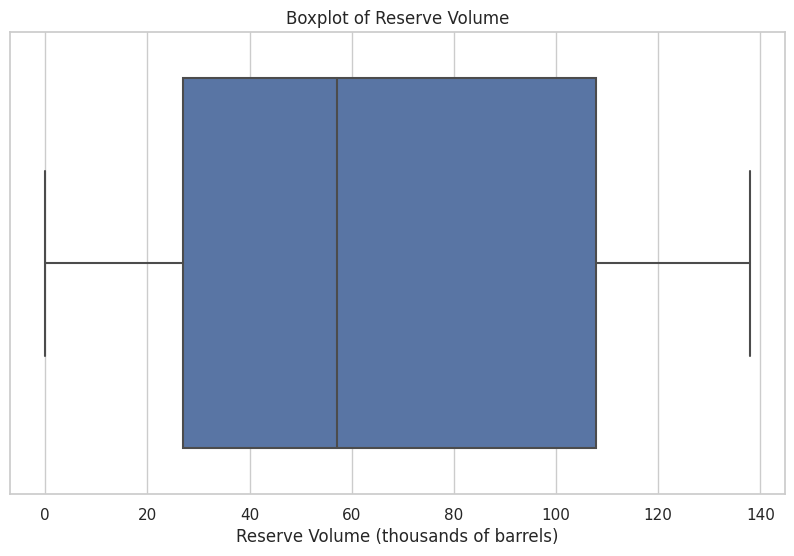

In [32]:
# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_1)
plt.title('Boxplot of Reserve Volume')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.show()

El diagrama de bloxplot nos indica que no hay outliers esto indica una distrucion uniforme en el rango establecido de los datos valores, la mediana esta mas orientada hacia Q1 nos indica que no existe tanta simetria en los datos


In [33]:
# Calcular estadisticas descriptivas para la variable objetivo
stats = target_1.describe()
print('Estadisticas descriptivas del volumen de reservas:')
print(stats)

Estadisticas descriptivas del volumen de reservas:
count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64


### Entrena el modelo y haz predicciones para el conjunto de validación.

In [34]:
# Entrenar el modelo de regresion lineal
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

LinearRegression()

In [35]:
# Aplicar validacion cruzada
cv_scores_1 = cross_val_score(model_1, features_train_1, target_train_1, cv=5, scoring='neg_mean_squared_error')
# Convertir los scores a valores positivos (ya que cross_val_score devuelve negativos para MSE)
mse_cv_1 = -cv_scores_1
rmse_cv_1 = np.sqrt(mse_cv_1)

print('MSE por fold_1:', mse_cv_1)
print('RMSE por fold_1:', rmse_cv_1)
print('MSE promedio_1:', mse_cv_1.mean())
print('RMSE promedio_1:', rmse_cv_1.mean())

MSE por fold_1: [0.7696626  0.8032365  0.79997326 0.79191222 0.79184944]
RMSE por fold_1: [0.87730417 0.89623462 0.89441224 0.8898945  0.88985922]
MSE promedio_1: 0.791326803811734
RMSE promedio_1: 0.8895409511809371


a ) para el RMSE lo que sugiere una precision muy alta en las predicciones
b) RMSE promedio el modelo al predecir los valores con un error de 0.88 inidica una buena precision, los resultados indican que el modelo de regresion lineal en la region 1 tiene un rendimiento optimo, con un error muy bajo y una consistencia alta en las predicciones. Esto sugiere que el modelo es adecuado para predecir el volumen de reservas en esta region con una alta precision.

### Guarda las predicciones y las respuestas correctas para el conjunto de validación.

In [36]:
# Hacer predicciones en el conjunto de   validacion
predictions_valid_1 = model_1.predict(features_valid_1)

In [37]:
# Calculo de R2 del conjunto de validacion
r2_1 = r2_score(target_valid_1, predictions_valid_1)
print('R2-Valid-1=', r2_1 )

R2-Valid-1= 0.9996233978805127


 Un R2 tan alto inidica que el modelo tiene un muy buen  rendimiento, se puede esperar que las predicciones del modelo sean muy precisas

### Muestra el volumen medio de reservas predicho y RMSE del modelo

In [38]:
# Calcular MSE y RMSE para el modelo de regresión lineal con validacion cruzada
mse_valid_1 = mean_squared_error(target_valid_1, predictions_valid_1)
print('MSE-valid-1 =', mse_valid_1)
print('RMSE-valid-1 =', mse_valid_1 ** 0.5)

MSE-valid-1 = 0.7976263360391157
RMSE-valid-1 = 0.893099286775617


Para el conjunto de validacion indica que el modelo de regresion lineal para esta region tiene un muy buen rendimiento con un error muy  bajo en sus predicciones en conjunto con el valor de R2 el modelo es muy preciso e ideal para predecir el volumen de reservas de esta region

In [39]:
# Calcular y mostrar el volumen medio de reservas predicho en ambos conjuntos
mean_predicted_valid_1 = np.mean(predictions_valid_1)
print('Volumen medio de reservas predicho (valid_1) =', mean_predicted_valid_1)

Volumen medio de reservas predicho (valid_1) = 68.728546895446


el volumen medio de reservas predicho en el conjunto de validacion tiene un rendimiento consistente el modelo captura bien la tendencia central de los datos indica que las predicciones son confiables para la region 1

### Entrena y prueba el modelo para cada región en geo_data_02.csv

In [40]:
#Preparar las caracteristicas y el objetivo
features_2 = geo_data_2.drop(['product'], axis=1)
target_2 = geo_data_2['product']
print(type(target_2))

<class 'pandas.core.series.Series'>


### Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

In [41]:
# Dividir los datos en conjuntos de entrenamiento y validacion
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

In [42]:
print(features_train_2.shape)
print(target_train_2.shape)
print(features_valid_2.shape)
print(target_valid_2.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


In [43]:
# Definir las columnas numericas
numeric_2 = ['f0', 'f1', 'f2'] 

In [44]:
# Guardar los nombres de las columnas antes de la estandarización
column_names = numeric_2

In [45]:
## Estandarizar las caracteristicas numericas
scaler = StandardScaler()
scaler = scaler.fit(features_train_2[numeric_2])
features_train_2 = scaler.transform(features_train_2[numeric_2]) 
features_valid_2 = scaler.transform(features_valid_2[numeric_2])
print(features_train_2)
print(features_valid_2)

[[-0.52615957  0.77632883 -0.40079292]
 [-0.88962499 -0.4040698  -1.22293566]
 [-1.1339838   0.20857647  0.2967648 ]
 ...
 [ 0.36856367  0.79722508  0.66557457]
 [-2.44068989  0.11378427  0.440907  ]
 [-1.73246811  0.39357329 -1.4244654 ]]
[[-0.8367172  -2.22743862 -0.07848897]
 [-0.8216484   0.74023665 -1.00081148]
 [-2.6513359  -0.2357207  -0.24454565]
 ...
 [ 0.41644358 -0.08459513  0.21898695]
 [-0.13665813 -0.10123498 -0.87078695]
 [-1.35956529 -0.59845714  1.71664386]]


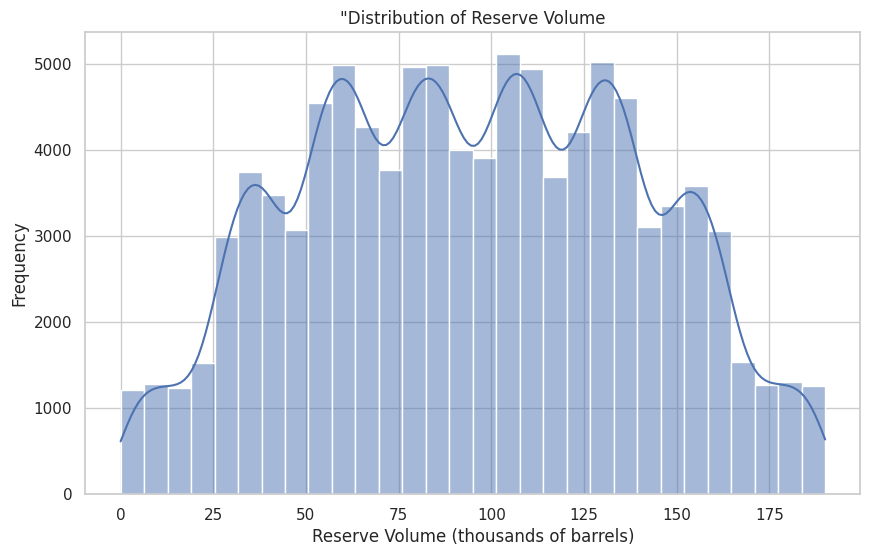

In [46]:
# Visualizar la distribucion del objetivo
plt.figure(figsize=(10, 6))
sns.histplot(target_2, bins=30, kde=True)
plt.title('"Distribution of Reserve Volume')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.ylabel('Frequency')
plt.show()

a) La distribucion multimodal al presentar varios tipos (modas) nos indican que los datos pueden estar agrupados en diferentes rangos indicando subpoblaciones dentro de los datos
b) Simetria la distribucion parece tener un equilibrio balanceado se puede ver en los valores centralos y diferencias entre los extremos
c) Los valores mas comunes del volumnen de reserva estan concentrados alrededor de los rangos de 50, 100, 125 ml de barriles indicando volumenes tipicos en el conjunto de datos
siendo muy similar a la region 0

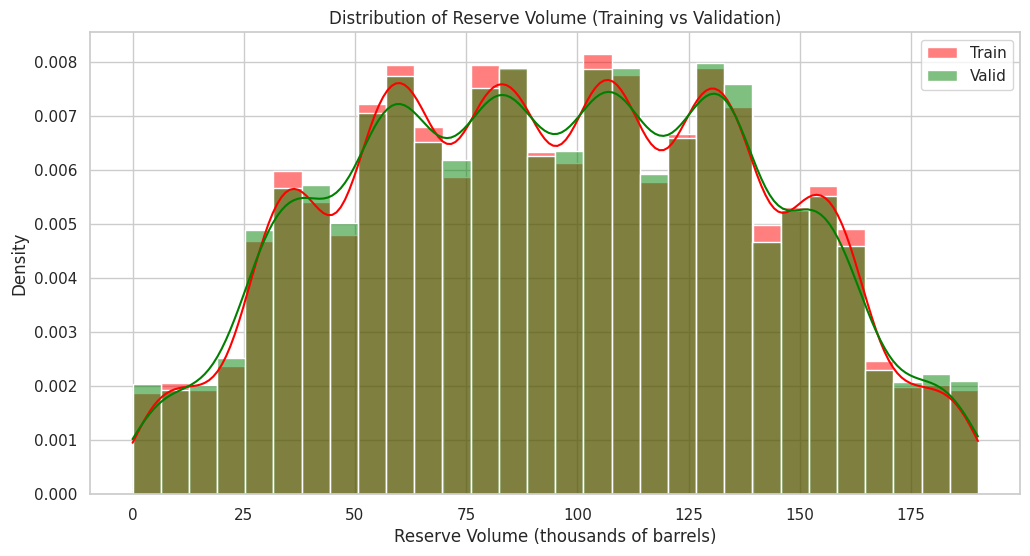

In [47]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 6))
# Histograma para el conjunto de entrenamiento
sns.histplot(target_train_2, bins = 30, kde = True, color = 'red', label = 'Train', stat= 'density', alpha=0.5)
# Histograma para el conjunto de validacion
sns.histplot(target_valid_2, bins=30, kde=True, color='green', label='Valid', stat='density', alpha=0.5)
plt.title('Distribution of Reserve Volume (Training vs Validation)')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.ylabel('Density')
plt.legend()

# Mostrar el grafico
plt.show()

a)Las distribuciones entre el entrenamiento y la validacion son similares en forma general  y densidad esto es deseable, lo que no indica que no hay sobreajuste ni subajuste aparentemente.
b) La multimodalidad ambas distribuciones muestran modas  alrededor de valores de 50, 100, 125 mil de barriles esto cons afirma la consistencia entre train y valid tiene la composicion equilibrada
c) Las areas bajo la curva nos muestra equilibrio entre los dos conjunto de datos y no se presenta un sesgo significativo entre los datos
muy similar de igual forma  la region 0

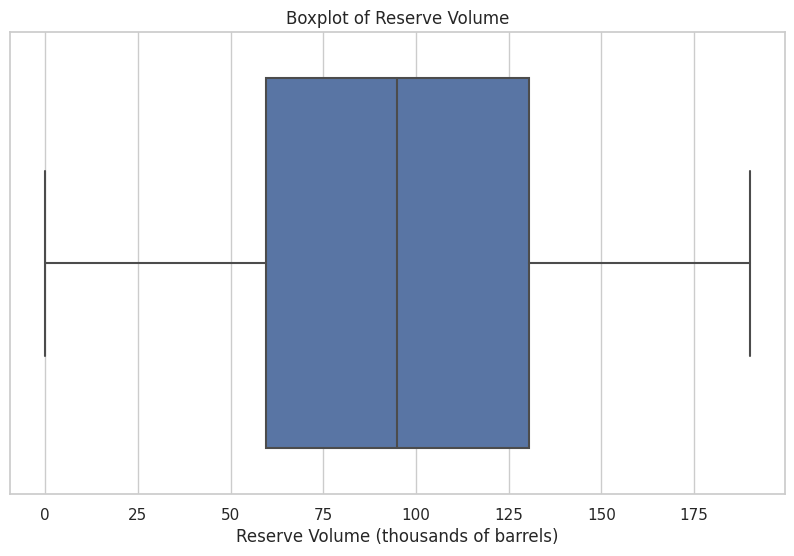

In [48]:
# Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_2)
plt.title('Boxplot of Reserve Volume')
plt.xlabel('Reserve Volume (thousands of barrels)')
plt.show()

a)El rango Q1 y Q3 es amplio mostrando una variacionen los valores centrales aproximadamente el 50% de los datos.
b) La mediana esta casi en el centro intercuantilico nos indica simetria en los datos
c)No hay outliers estos indica una distrucion uniforme en el rango establecido de los datos

In [49]:
# Calcular estadisticas descriptivas para la variable objetivo
stats = target_2.describe()
print('Estadisticas descriptivas del volumen de reservas:')
print(stats)

Estadisticas descriptivas del volumen de reservas:
count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


### Entrena el modelo y haz predicciones para el conjunto de validación.

In [50]:
# Entrenar el modelo de regresion lineal
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

LinearRegression()

In [51]:
# Aplicar validacion cruzada
cv_scores_2 = cross_val_score(model_2, features_train_2, target_train_2, cv=5, scoring='neg_mean_squared_error')
# Convertir los scores a valores positivos (ya que cross_val_score devuelve negativos para MSE)
mse_cv_2 = -cv_scores_2
rmse_cv_2 = np.sqrt(mse_cv_2)

print('MSE por fold_2:', mse_cv_2)
print('RMSE por fold_2:', rmse_cv_2)
print('MSE promedio_2:', mse_cv_2.mean())
print('RMSE promedio_2:', rmse_cv_2.mean())

MSE por fold_2: [1598.19456358 1601.01039236 1602.24677517 1607.33214117 1617.57822958]
RMSE por fold_2: [39.97742567 40.01262791 40.02807484 40.091547   40.21912766]
MSE promedio_2: 1605.272420369923
RMSE promedio_2: 40.06576061701094


a)El RMSE por fold indican que el error medio en cada iteracion es aprox 40.06 sugiere una precision moderada en la predicciones
b)El RMSE promedio el valor nos indica que en comparacion se tiene un rendimiento moderado y un error significativo en las predicciones

### Guarda las predicciones y las respuestas correctas para el conjunto de validación

In [52]:
# Hacer predicciones en el conjunto de  entreanmiento y validacion
predictions_valid_2 = model_2.predict(features_valid_2)


In [53]:
# Calculo de R2
r2_2 = r2_score(target_valid_2, predictions_valid_2)
print('R2-Valid-2=', r2_2 )

R2-Valid-2= 0.20524758386040443


Este resultado R2 para validacion no explica bien la variabilidad en los datos, lo que sugiere que no se captura adecuadamente las relaciones entre las variables. Un R² tan bajo se puede esperar que podría no ser adecuado para predecir el volumen de reservas en la region 2 

### Muestra el volumen medio de reservas predicho y RMSE del modelo

In [54]:
# Calcular MSE y RMSE para el modelo de regresión lineal y vlidacion cruzada
mse_valid_2 = mean_squared_error(target_valid_2, predictions_valid_2)
print('MSE-valid-2 =', mse_valid_2)
print('RMSE-valid-2 =', mse_valid_2 ** 0.5)

MSE-valid-2 = 1602.3775813236196
RMSE-valid-2 = 40.02970873393434


El valor RMSE en el conjunto de validación indican que el modelo de regresion lineal en la region 2 tiene un rendimiento moderado con un error significativo en sus predicciones similar al resultado con validacion cruzada

In [55]:
# Calcular y mostrar el volumen medio de reservas predicho en ambos conjuntos
mean_predicted_valid_2= np.mean(predictions_valid_2)
print('Volumen medio de reservas predicho (valid_2) =', mean_predicted_valid_2)

Volumen medio de reservas predicho (valid_2) = 94.96504596800489


El valor de volumen medio de reservas  en el conjunto de validacion es consistente con un rendimiento moderado, lo que sugiere que el modelo captura una tendencia central aparentemente razonable pero no del todo precisa. La precisión del modelo, combinada con este volumen medio, indica que las predicciones son útiles pero podrían requerir ajustes para distintas aplicaciones 

## Prepárate para el cálculo de ganancias

### Almacena todos los valores necesarios para los cálculos en variables separadas.

In [56]:
# Variables iniciales
total_investment = 100000000  # Inversion total en dolares
num_wells = 200  # Numero de pozos petroleros
cost_well= total_investment / num_wells  # Costo por pozo en dolares
cost_well = 500000
# Valores de producción
required_prod_well = 500000  # Produccion minima necesaria por pozo en dolares
required_prod_well_units = required_prod_well / 4500  # En unidades de producto
avg_prod_well_thousands_barrels= 111.1  # Produccion minima en miles de barriles

# Ingresos por barril y unidad
revenue_barrel = 4.5  # Ingreso por barril en dolares
revenue_unit= 4500  # Ingreso por unidad de producto en dolares



In [57]:
# Definir la funcion para calcular ganancia
def profit (num_barrels):
    revenues = revenue_barrel * num_barrels # Ingresos totales por barriles producidos
    total_costs = cost_well * num_wells # Inversion total
    profit_value = revenues - total_costs
    return profit_value  #Ganancia neta

num_barrels_produced = num_wells * avg_prod_well_thousands_barrels * 1000 #Comvertir a barriles
total_profit = profit(num_barrels_produced)
print("Ganancia total:", total_profit)
    

Ganancia total: -10000.0


-10,000 indica que el proyecto no es rentable bajo las condiciones actuales; los ingresos generados no cubren la inversión inicial.A pesar de que la producción promedio parece alta (111.1 miles de barriles), el ingreso por barril es relativamente bajo (4.5 dólares), lo que contribuye a que los ingresos totales sean insuficientes para cubrir la inversión

###  Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

In [58]:
# Datos para comparar 
data = {
    'Region': ['Region_0', 'Region_1', 'Region_2'], 'Produccion minima necesaria (miles de barriles)': [111.1, 111.1, 111.1], 'Volumen medio  de reservas (miles de barriles)':[92.59, 68.73, 94.97]
}
comparative_data = pd.DataFrame(data)
print(comparative_data )

     Region  Produccion minima necesaria (miles de barriles)  \
0  Region_0                                            111.1   
1  Region_1                                            111.1   
2  Region_2                                            111.1   

   Volumen medio  de reservas (miles de barriles)  
0                                           92.59  
1                                           68.73  
2                                           94.97  


### Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

La produccion minima necesaria cada pozo debe producir minimo  500, 000 dolares en unidades, equivalente a 111. 11 miles de barriles en comparacion con el volumen medio de reservas predicho por las tres regiones para la region 0 se obtuvo el valor de mean_predicted_valid_0 con 92.59 miles de barriles es evidente que esta por debajo de la produccion minima necesaria
b) Para la region 1 se obtuvo el valor de mean_predicted_valid_1 con 68.73 miles de barriles que de igual forma esta por muy por debajo de la produccion minima necesaria
c) Para la region 2 se obtuvo el valor de mean_predicted_valid_2 con 94.97 miles de barriles que en comparacion el numero de produccion minima necesaria esta por debajo del objetivo. Nos quiere decir con estos resultados que al estar por debajo del valor para evitar perdidas nos sugiere que los pozos en estas regiones no son rentables

## Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

### Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

In [59]:
# Seleccionar los 200 valores mas altos de cada conjunto de predicciones
top_200_values_0 = np.sort(predictions_valid_0)[::-1][:200]
top_200_values_1 = np.sort(predictions_valid_1)[::-1][:200]
top_200_values_2 = np.sort(predictions_valid_2)[::-1][:200]


### Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.

In [60]:
# Calcular el promedio de los valores seleccionados
avg_region_0 = np.mean(top_200_values_0)
avg_region_1 = np.mean(top_200_values_1)
avg_region_2 = np.mean(top_200_values_2)

print(f"Promedio de predicciones en region 0: {avg_region_0}")
print(f"Promedio de predicciones en region 1: {avg_region_1}")
print(f"Promedio de predicciones en region 2: {avg_region_2}")

Promedio de predicciones en region 0: 155.511654194057
Promedio de predicciones en region 1: 138.73013391081716
Promedio de predicciones en region 2: 148.01949329159174


Al seleccionar los 200 mejores pozos segun mis valores de prediccion en cada una de las 3 regiones, la region que tiene un promedio de predicciones mas alto sugiere que tiene un gran potencial significativo  de reservas petroliferas

### Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

In [61]:
# Variables
num_wells_region = 200
# Calcular la producción total por region (asumiendo que cada prediccion es en miles de barriles)
production_region_0 = avg_region_0 * num_wells_region * 1000
production_region_1 = avg_region_1 * num_wells_region * 1000
production_region_2 = avg_region_2 * num_wells_region * 1000
def final_profit(num_barrels, num_wells):
    final_revenues = revenue_barrel * num_barrels
    final_total_costs = cost_well * num_wells
    final_profit_value = final_revenues - final_total_costs
    return final_profit_value
#Calcular ganancia por region
gain_region_0 = final_profit(production_region_0, num_wells_region)
gain_region_1 = final_profit(production_region_1, num_wells_region)
gain_region_2 = final_profit(production_region_2, num_wells_region)

print(f"Ganancia potencial en region 0: {gain_region_0} dolares")
print(f"Ganancia potencial en region 1: {gain_region_1} dolares")
print(f"Ganancia potencial en region 2: {gain_region_2} dolares")

Ganancia potencial en region 0: 39960488.77465132 dolares
Ganancia potencial en region 1: 24857120.519735456 dolares
Ganancia potencial en region 2: 33217543.96243258 dolares


In [62]:
# Seleccionar la region con la ganancia potencial mas alta
max_gain = max ( gain_region_0, gain_region_1, gain_region_2)
if max_gain == gain_region_0:
    print("La region mas adecuada para el desarrollo de pozos petrolíferos es la region 0")
elif max_gain == gain_region_1:
    print("La region mas adecuada para el desarrollo de pozos petrolíferos es la region 1")
else:
    print("La region mas adecuada para el desarrollo de pozos petrolíferos es la region 2")


La region mas adecuada para el desarrollo de pozos petrolíferos es la region 0


En base a la escala de operaiones de la industria petrolera por ese motivo las grandes cantidades de dinero en las 3 regiones, la gananacia neta calculada refleja la rentabilidad potencial del proyecto en cada region. La region para el desarrollo de pozos petrolíferos es la 0 ya que segun los calculos realizados es la region mas optima y rentable.

## Calcula riesgos y ganancias para cada región:


### Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

In [63]:
num_samples = 1000
# Aplicar bootstrapping
bootstrap_gains_0 = []
bootstrap_gains_1 = []
bootstrap_gains_2 = []
for _ in range(num_samples):
    # Muestrear con reemplazo
    sample_0 = np.random.choice(top_200_values_0, size= num_wells_region, replace=True)
    sample_1 = np.random.choice(top_200_values_1, size= num_wells_region, replace=True)
    sample_2 = np.random.choice(top_200_values_2, size= num_wells_region, replace=True)
    #Calcular produccion total para cada muestra
    production_sample_0 = sample_0.sum() * 1000
    production_sample_1 = sample_1.sum() * 1000
    production_sample_2 = sample_2.sum() * 1000
    # Calcular ganancia para cada muestra
    gain_sample_0 = final_profit(production_sample_0, num_wells_region)
    gain_sample_1 = final_profit(production_sample_1, num_wells_region)
    gain_sample_2 = final_profit(production_sample_2, num_wells_region)
    #Almacenar ganancias
    bootstrap_gains_0.append(gain_sample_0)
    bootstrap_gains_1.append(gain_sample_1)
    bootstrap_gains_2.append(gain_sample_2)
# Convertir a arrays NumPy para facilitar el análisis
bootstrap_gains_0 = np.array(bootstrap_gains_0)
bootstrap_gains_1 = np.array(bootstrap_gains_1)
bootstrap_gains_2 = np.array(bootstrap_gains_2)
# Calcular beneficio promedio
mean_gain_0 = np.mean(bootstrap_gains_0)
mean_gain_1 = np.mean(bootstrap_gains_1)
mean_gain_2 = np.mean(bootstrap_gains_2)
# Calcular intervalo de confianza de 95%
percentile_025_0 = np.percentile(bootstrap_gains_0, 2.5)
percentile_975_0 = np.percentile(bootstrap_gains_0, 97.5)
percentile_025_1 = np.percentile(bootstrap_gains_1, 2.5)
percentile_975_1 = np.percentile(bootstrap_gains_1, 97.5)
percentile_025_2 = np.percentile(bootstrap_gains_2, 2.5)
percentile_975_2 = np.percentile(bootstrap_gains_2, 97.5)

### Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

In [64]:
print(f"Beneficio promedio en region 0: {mean_gain_0} dolares")
print(f"Beneficio promedio en region 1: {mean_gain_1} dolares")
print(f"Beneficio promedio en region 2: {mean_gain_2} dolares")
print()
print(f"Intervalo de confianza del 95% para region 0: [{percentile_025_0}, {percentile_975_0}]")
print(f"Intervalo de confianza del 95% para region 1: [{percentile_025_1}, {percentile_975_1}]")
print(f"Intervalo de confianza del 95% para region 2: [{percentile_025_2}, {percentile_975_2}]")

Beneficio promedio en region 0: 39951107.63979605 dolares
Beneficio promedio en region 1: 24857039.796076134 dolares
Beneficio promedio en region 2: 33224826.48344181 dolares

Intervalo de confianza del 95% para region 0: [39220551.232407756, 40719707.34779996]
Intervalo de confianza del 95% para region 1: [24822943.744321503, 24895093.326834925]
Intervalo de confianza del 95% para region 2: [32577461.102939997, 33869882.22494608]


In [65]:
# Calcular riesgo de perdidas (probabilidad de ganancia negativa)
risk_loss_0 = np.mean(bootstrap_gains_0 < 0) * 100
risk_loss_1 = np.mean(bootstrap_gains_1 < 0) * 100
risk_loss_2 = np.mean(bootstrap_gains_2 < 0) * 100
print(f"Riesgo de perdidas en region 0: {risk_loss_0}%")
print(f"Riesgo de perdidas en region 1: {risk_loss_1}%")
print(f"Riesgo de perdidas en region 2: {risk_loss_2}%")


Riesgo de perdidas en region 0: 0.0%
Riesgo de perdidas en region 1: 0.0%
Riesgo de perdidas en region 2: 0.0%


In [66]:
# Seleccionar regiones con riesgo de perdidas inferior al 2.5%
eligible_regions = []
if risk_loss_0 <= 2.5:
    eligible_regions.append(('Region 0', mean_gain_0))
if risk_loss_1 <= 2.5:
    eligible_regions.append(('Region 1', mean_gain_1))
if risk_loss_2 <= 2.5:
    eligible_regions.append(('Region 2', mean_gain_2))
print("Regiones elegibles:", eligible_regions)

Regiones elegibles: [('Region 0', 39951107.63979605), ('Region 1', 24857039.796076134), ('Region 2', 33224826.48344181)]


In [67]:
# Seleccionar la region con el beneficio promedio mas alto
if eligible_regions:
    eligible_regions.sort(key=lambda x: x[1])
    best_region = eligible_regions[-1]
    print(f"La region mas adecuada es {best_region[0]} con un beneficio promedio de {best_region[1]} dolares")
else:
    print('No hay regiones que cumplan con el criterio de riesgo')

La region mas adecuada es Region 0 con un beneficio promedio de 39951107.63979605 dolares


In [68]:
data_region_0 = {
    "Categoria": ['Beneficio promedio', 'Ganancia potencial'],
    "Valor (USD)": [39977774.42, 39960488.77]
}

# Crear DataFrame
df = pd.DataFrame(data_region_0)

# Mostrar DataFrame
print(df)

            Categoria  Valor (USD)
0  Beneficio promedio  39977774.42
1  Ganancia potencial  39960488.77


## Conclusion general 

El objetivo del proyecto el analisis de la compañía de extracción de petróleo OilyGiant, es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo, previo a esto se calculo la ganancia dada la inversion de 100 millones de dolares nos indica con la perdida de 10000 dado que el proyecto no era rentable los ingresos generados no cubren  la inversion inicial  a pesar de la que la produccion promedio es de 111.11 miles de barriles  ya que eñ ingreso por barril es relativamente bajo de 4.5  dolares lo que contribuye  a que los ingresos totales sean insuficientes. El calculo de las ganacias mediante la eleccion de los 200 pozos con los valores de prediccion mas altos de las 3 regiones al realizar el calculo promedio de las predicciones se selecciono la region 0 ya que presentaba mayor ingreso que las otras 2 con la cantidad de 39,960,488.77 de dolares siendo la region mas optima y rentable. En comparacion con el metodo de bootstrapping ya que proporciona una estimacion donde se considera la variabilidad completa de los datos con una muestra de 1000 y la eleccion de la region 0 con riesgo de perdidas inferior al 2.5% fue de in beneficio promedio 39,977,774.42 la diferencia es relativamente pequeña puede deberse a como se distribuyen los datos siendo la tecnica de boostrapping superior, pero cumpliendo el objetivo al encontrar los 200 mejores pozos fue la region 0 la mas rentable.